# NHIS - Data explore

**Goals** 
* Understand the NHIS dataset fields, focused on neurodiversity related felds
* Come up with scripts to transform and impute values prior to further exploration or prediction
* Run simple correlation & regression analysis


**Notable assumptions being made**
* Sample data from has similar distribution as general US population (e.g. income class, region)
* We will use ADHDEV_C (ADHD) and ASDEV_C (Autistic Spectrum Disorder) as the main target labels for exploration & analysis

## Results/insights summary

* Few transformations done/proposed prior to further analysis
* There are rotating questions that only happens once every few years
* ASD, ADHD question is not being asked in adults dataset

## Imports and initializations

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
import statsmodels.api as sm
import seaborn as sns


import os
        
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree
from phik import phik_matrix
from scipy.stats import chi2_contingency

In [2]:
pd.set_option('display.max_rows', 500)  # Set the option to display all rows
pd.set_option('display.max_columns', 100)  # Set the option to display all rows

#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

In [3]:
#import data and reserve the originals as read only

dfc22_orig = pd.read_csv('source/child22.csv')
dfa22_orig = pd.read_csv('source/adult22.csv')
dfc21_orig = pd.read_csv('source/child21.csv')
dfa21_orig = pd.read_csv('source/adult21.csv')
dfc20_orig = pd.read_csv('source/child20.csv')
dfa20_orig = pd.read_csv('source/adult20.csv')
dfc19_orig = pd.read_csv('source/child19.csv')
dfa19_orig = pd.read_csv('source/adult19.csv')



#Copying to working dataframe, also removing columns not planned to be used
#Fields to be extracted are decided on a separate spreadsheet
dfc22 = dfc22_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_C', 'REGION', 'INTV_QRT', 'INTV_MON', 'HHSTAT_C', 'RELTIVP_C', 'SEX_C', 'AGEP_C', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_C', 'PCNTKIDS_C', 'OVER65FLG_C', 'MLTFAMFLG_C', 'PHSTAT_C', 'LSATIS11_C', 'ADHDEV_C', 'ADHDNW_C', 'IDEV1_C', 'IDNW1_C', 'ASDEV_C', 'ASDNW_C', 'DDEV_C', 'DDNW_C', 'LDEV_C', 'LDNW_C', 'BMICAT_C', 'WEARGLSS_C', 'VISIONDF_C', 'HEARINGDF_C', 'UNDRSTYOU_C', 'UNDRSTCHD_C', 'UNDRSTIHH_C', 'UNDRSTOHH_C', 'LEARNDF_C', 'REMEMBERDF_C', 'ANXFREQ_C', 'DEPFREQ_C', 'BEHDFPLYG_C', 'BEHKBHYG_C', 'BEHDFCNTR_C', 'BEHDFFCS_C', 'BEHDFCHG_C', 'BEHDFMKFR_C', 'BSCNWPPL_C', 'BSCNWPLCS_C', 'BSCCHG_C', 'BSCHLOPPL_C', 'BSCCRYALT_C', 'BSCCLMDWN_C', 'BSCFUSSY_C', 'BSCSTHE_C', 'BSCSCHD_C', 'BSCPTSLP_C', 'BSCSTYSLP_C', 'SCHSPEDEV_C', 'SCHSPED_C', 'SCHSPEDEM_C', 'SDQ1_C', 'SDQ2_C', 'SDQ3_C', 'SDQ4_C', 'SDQ5_C', 'SDQ6_C', 'SDQ7_C', 'SDQ8_C', 'SDQ9_C', 'SDQ10_C', 'SDQ11_C', 'SDQ12_C', 'SDQ13_C', 'SDQ14_C', 'SDQ15_C', 'SDQ16_C', 'SDQ17_C', 'SDQ18_C', 'SDQ19_C', 'SDQ20_C', 'SDQ21_C', 'SDQ22_C', 'SDQ23_C', 'SDQ24_C', 'SDQ25_C', 'SDQIMP1_C', 'SDQIMP2_C', 'SDQIMP3_C', 'SDQIMP4_C', 'SDQIMP5_C', 'SDQIMP6_C', 'SDQIMP7_C', 'SDQIMP8_C', 'SDQEMOT_C', 'SDQCOND_C', 'SDQHYPE_C', 'SDQPEER_C', 'SDQPROS_C', 'SDQTOT_C', 'SDQIMPTOT_C', 'VIOLENEV_C', 'JAILEV1_C', 'MENTDEPEV_C', 'ALCDRUGEV_C', 'PUTDOWN_C', 'BNEEDS_C', 'UNFAIRRE_C', 'UNFAIRSO_C', 'BULLYVIC_C', 'CYBERVIC_C', 'BULLYPERP_C', 'TBILOSTCON_C', 'TBIDAZED_C', 'POVRATTC_C', 'RATCAT_C']].copy()
dfc21 = dfc21_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_C', 'REGION', 'INTV_QRT', 'INTV_MON', 'HHSTAT_C', 'RELTIVP_C', 'SEX_C', 'AGEP_C', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_C', 'PCNTKIDS_C', 'OVER65FLG_C', 'MLTFAMFLG_C', 'PHSTAT_C', 'LSATIS11_C', 'ADHDEV_C', 'ADHDNW_C', 'ASDEV_C', 'ASDNW_C', 'DDEV_C', 'DDNW_C', 'LDEV_C', 'LDNW_C', 'WEARGLSS_C', 'VISIONDF_C', 'HEARINGDF_C', 'UNDRSTYOU_C', 'UNDRSTCHD_C', 'UNDRSTIHH_C', 'UNDRSTOHH_C', 'LEARNDF_C', 'REMEMBERDF_C', 'ANXFREQ_C', 'DEPFREQ_C', 'BEHDFPLYG_C', 'BEHKBHYG_C', 'BEHDFCNTR_C', 'BEHDFFCS_C', 'BEHDFCHG_C', 'BEHDFMKFR_C', 'BSCNWPPL_C', 'BSCNWPLCS_C', 'BSCCHG_C', 'BSCHLOPPL_C', 'BSCCRYALT_C', 'BSCCLMDWN_C', 'BSCFUSSY_C', 'BSCSTHE_C', 'BSCSCHD_C', 'BSCPTSLP_C', 'BSCSTYSLP_C', 'SCHSPEDEV_C', 'SCHSPED_C', 'SCHSPEDEM_C', 'VIOLENEV_C', 'JAILEV1_C', 'MENTDEPEV_C', 'ALCDRUGEV_C', 'PUTDOWN_C', 'BNEEDS_C', 'UNFAIRRE_C', 'UNFAIRSO_C', 'BULLYVIC_C', 'CYBERVIC_C', 'BULLYPERP_C', 'TBILOSTCON_C', 'TBIDAZED_C', 'POVRATTC_C', 'RATCAT_C']].copy()
dfc20 = dfc20_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_C', 'REGION', 'INTV_QRT', 'INTV_MON', 'HHSTAT_C', 'RELTIVP_C', 'SEX_C', 'AGEP_C', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_C', 'PCNTKIDS_C', 'OVER65FLG_C', 'MLTFAMFLG_C', 'PHSTAT_C', 'ADHDEV_C', 'ADHDNW_C', 'ASDEV_C', 'ASDNW_C', 'DDEV_C', 'DDNW_C', 'LDEV_C', 'LDNW_C', 'BMICAT_C', 'WEARGLSS_C', 'VISIONDF_C', 'HEARINGDF_C', 'UNDRSTYOU_C', 'UNDRSTCHD_C', 'UNDRSTIHH_C', 'UNDRSTOHH_C', 'LEARNDF_C', 'REMEMBERDF_C', 'ANXFREQ_C', 'DEPFREQ_C', 'BEHDFPLYG_C', 'BEHKBHYG_C', 'BEHDFCNTR_C', 'BEHDFFCS_C', 'BEHDFCHG_C', 'BEHDFMKFR_C', 'BSCNWPPL_C', 'BSCNWPLCS_C', 'BSCCHG_C', 'BSCHLOPPL_C', 'BSCCRYALT_C', 'BSCCLMDWN_C', 'BSCFUSSY_C', 'BSCSTHE_C', 'BSCSCHD_C', 'BSCPTSLP_C', 'BSCSTYSLP_C', 'SCHSPEDEV_C', 'SCHSPED_C', 'SCHSPEDEM_C', 'TBILOSTCON_C', 'TBIDAZED_C', 'POVRATTC_C', 'RATCAT_C']].copy()
dfc19 = dfc19_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_C', 'REGION', 'INTV_QRT', 'HHSTAT_C', 'RELTIVP_C', 'SEX_C', 'AGEP_C', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_C', 'PCNTKIDS_C', 'OVER65FLG_C', 'MLTFAMFLG_C', 'PHSTAT_C', 'ADHDEV_C', 'ADHDNW_C', 'ASDEV_C', 'ASDNW_C', 'DDEV_C', 'DDNW_C', 'LDEV_C', 'LDNW_C', 'WEARGLSS_C', 'VISIONDF_C', 'HEARINGDF_C', 'UNDRSTYOU_C', 'UNDRSTCHD_C', 'UNDRSTIHH_C', 'UNDRSTOHH_C', 'LEARNDF_C', 'REMEMBERDF_C', 'ANXFREQ_C', 'DEPFREQ_C', 'BEHDFPLYG_C', 'BEHKBHYG_C', 'BEHDFCNTR_C', 'BEHDFFCS_C', 'BEHDFCHG_C', 'BEHDFMKFR_C', 'BSCNWPPL_C', 'BSCNWPLCS_C', 'BSCCHG_C', 'BSCHLOPPL_C', 'BSCCRYALT_C', 'BSCCLMDWN_C', 'BSCFUSSY_C', 'BSCSTHE_C', 'BSCSCHD_C', 'BSCPTSLP_C', 'BSCSTYSLP_C', 'SCHSPEDEV_C', 'SCHSPED_C', 'SCHSPEDEM_C', 'SDQ1_C', 'SDQ2_C', 'SDQ3_C', 'SDQ4_C', 'SDQ5_C', 'SDQ6_C', 'SDQ7_C', 'SDQ8_C', 'SDQ9_C', 'SDQ10_C', 'SDQ11_C', 'SDQ12_C', 'SDQ13_C', 'SDQ14_C', 'SDQ15_C', 'SDQ16_C', 'SDQ17_C', 'SDQ18_C', 'SDQ19_C', 'SDQ20_C', 'SDQ21_C', 'SDQ22_C', 'SDQ23_C', 'SDQ24_C', 'SDQ25_C', 'SDQIMP1_C', 'SDQIMP2_C', 'SDQIMP3_C', 'SDQIMP4_C', 'SDQIMP5_C', 'SDQIMP6_C', 'SDQIMP7_C', 'SDQIMP8_C', 'SDQEMOT_C', 'SDQCOND_C', 'SDQHYPE_C', 'SDQPEER_C', 'SDQPROS_C', 'SDQTOT_C', 'SDQIMPTOT_C', 'VIOLENEV_C', 'MENTDEPEV_C', 'ALCDRUGEV_C', 'POVRATTC_C', 'RATCAT_C']].copy()


dfa22 = dfa22_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_A', 'REGION', 'INTV_QRT', 'INTV_MON', 'HHSTAT_A', 'AVAIL_A', 'PROXY_A', 'PROXYREL_A', 'SEX_A', 'AGEP_A', 'AGE65', 'RACEALLP_A', 'EDUCP_A', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_A', 'PCNTKIDS_A', 'OVER65FLG_A', 'PHSTAT_A', 'LSATIS4_A', 'HYPEV_A', 'HYPDIF_A', 'HYP12M_A', 'ANXEV_A', 'DEPEV_A', 'COMDIFF_A', 'COGMEMDFF_A', 'COGTYPEDFF_A', 'COGFRQDFF_A', 'COGAMTDFF_A', 'OGHDHP_A', 'PLEXCHOG_A', 'OGFLG_A', 'MILITARY_A', 'MILSPC1R_A', 'MILSPC2_A', 'MILSPC3_A', 'IHS_A', 'HILAST_A', 'HILASTMY_A', 'HISTOPJOB_A', 'HISTOPMISS_A', 'HISTOPAGE_A', 'HISTOPCOST_A', 'HISTOPELIG_A', 'RSNHICOST_A', 'RSNHIWANT_A', 'RSNHIELIG_A', 'RSNHICONF_A', 'RSNHIMEET_A', 'RSNHIWAIT_A', 'RSNHIOTH_A', 'RSNHIJOB_A', 'RSNHIMISS_A', 'HINOTYR_A', 'HINOTMYR_A', 'MILSPC1_A', 'HICOV_A', 'HIKIND01_A', 'HIKIND02_A', 'HIKIND03_A', 'HIKIND04_A', 'HIKIND05_A', 'HIKIND06_A', 'HIKIND07_A', 'HIKIND08_A', 'HIKIND09_A', 'HIKIND10_A', 'MCAREPRB_A', 'MCAIDPRB_A', 'PAYBLL12M_A', 'PAYNOBLLNW_A', 'PAYWORRY_A', 'CVDDIAG_A', 'POSTEST_A', 'CVDSEV_A', 'LONGCVD_A', 'SYMPNOW_A', 'DENPREV_A', 'DENDL12M_A', 'DENNG12M_A', 'LASTDR_A', 'WELLNESS_A', 'ANXFREQ_A', 'ANXMED_A', 'ANXLEVEL_A', 'DEPFREQ_A', 'DEPMED_A', 'DEPLEVEL_A', 'MHRX_A', 'MHTHRPY_A', 'MHTPYNOW_A', 'PHQ81_A', 'PHQ82_A', 'PHQ83_A', 'PHQ84_A', 'PHQ85_A', 'PHQ86_A', 'PHQ87_A', 'PHQ88_A', 'PHQCAT_A', 'GAD71_A', 'GAD72_A', 'GAD73_A', 'GAD74_A', 'GAD75_A', 'GAD76_A', 'GAD77_A', 'GADCAT_A', 'SMKTLK1_A', 'ECIGEV_A', 'CIGARCUR_A']].copy()
dfa21 = dfa21_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_A', 'REGION', 'INTV_QRT', 'INTV_MON', 'HHSTAT_A', 'AVAIL_A', 'PROXY_A', 'PROXYREL_A', 'SEX_A', 'AGEP_A', 'AGE65', 'RACEALLP_A', 'EDUCP_A', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_A', 'PCNTKIDS_A', 'OVER65FLG_A', 'PHSTAT_A', 'HYPEV_A', 'HYPDIF_A', 'HYP12M_A', 'ANXEV_A', 'DEPEV_A', 'COMDIFF_A', 'COGMEMDFF_A', 'COGTYPEDFF_A', 'COGFRQDFF_A', 'COGAMTDFF_A', 'OGHDHP_A', 'PLEXCHOG_A', 'OGFLG_A', 'MILITARY_A', 'MILSPC1R_A', 'MILSPC2_A', 'MILSPC3_A', 'IHS_A', 'HILAST_A', 'HILASTMY_A', 'HISTOPJOB_A', 'HISTOPMISS_A', 'HISTOPAGE_A', 'HISTOPCOST_A', 'HISTOPELIG_A', 'RSNHICOST_A', 'RSNHIWANT_A', 'RSNHIELIG_A', 'RSNHICONF_A', 'RSNHIMEET_A', 'RSNHIWAIT_A', 'RSNHIOTH_A', 'RSNHIJOB_A', 'RSNHIMISS_A', 'HINOTYR_A', 'HINOTMYR_A', 'MILSPC1_A', 'HICOV_A', 'HIKIND01_A', 'HIKIND02_A', 'HIKIND03_A', 'HIKIND04_A', 'HIKIND05_A', 'HIKIND06_A', 'HIKIND07_A', 'HIKIND08_A', 'HIKIND09_A', 'HIKIND10_A', 'MCAREPRB_A', 'MCAIDPRB_A', 'PAYBLL12M_A', 'PAYNOBLLNW_A', 'PAYWORRY_A', 'CVDDIAG_A', 'CVDSEV_A', 'LASTDR_A', 'WELLNESS_A', 'ANXFREQ_A', 'ANXMED_A', 'ANXLEVEL_A', 'DEPFREQ_A', 'DEPMED_A', 'DEPLEVEL_A', 'MHRX_A', 'MHTHRPY_A', 'MHTPYNOW_A', 'ECIGEV_A', 'CIGARCUR_A']].copy()
dfa20 = dfa20_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_A', 'REGION', 'INTV_QRT', 'INTV_MON', 'HHSTAT_A', 'AVAIL_A', 'PROXY_A', 'PROXYREL_A', 'SEX_A', 'AGEP_A', 'AGE65', 'RACEALLP_A', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_A', 'PCNTKIDS_A', 'OVER65FLG_A', 'PHSTAT_A', 'HYPEV_A', 'HYPDIF_A', 'HYP12M_A', 'ANXEV_A', 'DEPEV_A', 'COMDIFF_A', 'COGMEMDFF_A', 'COGTYPEDFF_A', 'COGFRQDFF_A', 'COGAMTDFF_A', 'OGHDHP_A', 'PLEXCHOG_A', 'OGFLG_A', 'MILITARY_A', 'MILSPC1R_A', 'MILSPC2_A', 'MILSPC3_A', 'IHS_A', 'HILAST_A', 'HILASTMY_A', 'HISTOPJOB_A', 'HISTOPMISS_A', 'HISTOPAGE_A', 'HISTOPCOST_A', 'HISTOPELIG_A', 'RSNHICOST_A', 'RSNHIWANT_A', 'RSNHIELIG_A', 'RSNHICONF_A', 'RSNHIMEET_A', 'RSNHIWAIT_A', 'RSNHIOTH_A', 'RSNHIJOB_A', 'RSNHIMISS_A', 'HINOTYR_A', 'HINOTMYR_A', 'MILSPC1_A', 'HICOV_A', 'HIKIND01_A', 'HIKIND02_A', 'HIKIND03_A', 'HIKIND04_A', 'HIKIND05_A', 'HIKIND06_A', 'HIKIND07_A', 'HIKIND08_A', 'HIKIND09_A', 'HIKIND10_A', 'MCAREPRB_A', 'MCAIDPRB_A', 'PAYBLL12M_A', 'PAYNOBLLNW_A', 'PAYWORRY_A', 'CVDDIAG_A', 'CVDSEV_A', 'DENPREV_A', 'DENDL12M_A', 'DENNG12M_A', 'LASTDR_A', 'WELLNESS_A', 'ANXFREQ_A', 'ANXMED_A', 'ANXLEVEL_A', 'DEPFREQ_A', 'DEPMED_A', 'DEPLEVEL_A', 'MHRX_A', 'MHTHRPY_A', 'MHTPYNOW_A', 'ECIGEV_A', 'CIGARCUR_A']].copy()
dfa19 = dfa19_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_A', 'REGION', 'INTV_QRT', 'HHSTAT_A', 'AVAIL_A', 'PROXY_A', 'PROXYREL_A', 'SEX_A', 'AGEP_A', 'AGE65', 'RACEALLP_A', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_A', 'PCNTKIDS_A', 'OVER65FLG_A', 'PHSTAT_A', 'HYPEV_A', 'HYPDIF_A', 'HYP12M_A', 'ANXEV_A', 'DEPEV_A', 'COMDIFF_A', 'COGMEMDFF_A', 'COGTYPEDFF_A', 'COGFRQDFF_A', 'COGAMTDFF_A', 'OGHDHP_A', 'PLEXCHOG_A', 'OGFLG_A', 'MILITARY_A', 'MILSPC1R_A', 'MILSPC2_A', 'MILSPC3_A', 'IHS_A', 'HILAST_A', 'HILASTMY_A', 'HISTOPJOB_A', 'HISTOPMISS_A', 'HISTOPAGE_A', 'HISTOPCOST_A', 'HISTOPELIG_A', 'RSNHICOST_A', 'RSNHIWANT_A', 'RSNHIELIG_A', 'RSNHICONF_A', 'RSNHIMEET_A', 'RSNHIWAIT_A', 'RSNHIOTH_A', 'RSNHIJOB_A', 'RSNHIMISS_A', 'HINOTYR_A', 'HINOTMYR_A', 'MILSPC1_A', 'HICOV_A', 'HIKIND01_A', 'HIKIND02_A', 'HIKIND03_A', 'HIKIND04_A', 'HIKIND05_A', 'HIKIND06_A', 'HIKIND07_A', 'HIKIND08_A', 'HIKIND09_A', 'HIKIND10_A', 'MCAREPRB_A', 'MCAIDPRB_A', 'PAYBLL12M_A', 'PAYNOBLLNW_A', 'PAYWORRY_A', 'DENPREV_A', 'DENDL12M_A', 'DENNG12M_A', 'LASTDR_A', 'WELLNESS_A', 'ANXFREQ_A', 'ANXMED_A', 'ANXLEVEL_A', 'DEPFREQ_A', 'DEPMED_A', 'DEPLEVEL_A', 'MHRX_A', 'MHTHRPY_A', 'MHTPYNOW_A', 'PHQ81_A', 'PHQ82_A', 'PHQ83_A', 'PHQ84_A', 'PHQ85_A', 'PHQ86_A', 'PHQ87_A', 'PHQ88_A', 'PHQCAT_A', 'GAD71_A', 'GAD72_A', 'GAD73_A', 'GAD74_A', 'GAD75_A', 'GAD76_A', 'GAD77_A', 'GADCAT_A', 'ECIGEV_A', 'CIGARCUR_A']].copy()

#dfcall = pd.concat([dfc22,dfc21,dfc20,dfc19],axis=0)
dfcall = pd.concat([dfc22,dfc21,dfc20,dfc19],axis=0)

dfaall = pd.concat([dfa22,dfa21,dfa20,dfa19],axis=0)


In [4]:
#Also importing the column description table so it's easier to refer to
cookbook_child = pd.read_csv('source/child-summary.csv')

In [5]:
#Checking shape
print(f"Child shape: {dfc22.shape} \nAdult shape: {dfa22.shape}")

Child shape: (7464, 116) 
Adult shape: (27651, 115)


# Child

## Missing/null values

In [6]:
#Checking null values & percentages

num_of_rows = dfcall.shape[0]

dfc_nullcheck = pd.DataFrame(dfcall.isna().sum().reset_index())
dfc_nullcheck = dfc_nullcheck.rename({0:'nulls'},axis=1)
dfc_nullcheck['percentage'] = dfc_nullcheck['nulls'] / num_of_rows
dfc_nullcheck['description'] = pd.merge(dfc_nullcheck, cookbook_child, left_on='index', right_on='Variable Name')['Description']
dfc_nullcheck.sort_values('percentage',ascending=False)

index  nulls  percentage  \
22        IDNW1_C  30590    0.996157   
24        ASDNW_C  29818    0.971017   
26         DDNW_C  29153    0.949362   
28         LDNW_C  28726    0.935457   
20       ADHDNW_C  28053    0.913540   
60    SCHSPEDEM_C  27915    0.909047   
53     BSCFUSSY_C  27378    0.891559   
54      BSCSTHE_C  27378    0.891559   
55      BSCSCHD_C  27378    0.891559   
56     BSCPTSLP_C  27378    0.891559   
52    BSCCLMDWN_C  27378    0.891559   
57    BSCSTYSLP_C  27378    0.891559   
51    BSCCRYALT_C  27378    0.891559   
48    BSCNWPLCS_C  27378    0.891559   
50    BSCHLOPPL_C  27378    0.891559   
49       BSCCHG_C  27378    0.891559   
47     BSCNWPPL_C  27378    0.891559   
88      SDQIMP3_C  26726    0.870327   
100   SDQIMPTOT_C  26726    0.870327   
89      SDQIMP4_C  26726    0.870327   
90      SDQIMP5_C  26726    0.870327   
91      SDQIMP6_C  26726    0.870327   
92      SDQIMP7_C  26726    0.870327   
93      SDQIMP8_C  26726    0.870327   
87      SDQIMP2_C  26726    0.870327   
59      SCHSPED_C  26501    0.863000   
33    UNDRSTYOU_C  26000    0.846685   
34    UNDRSTCHD_C  26000    0.846685   
41    BEHDFPLYG_C  26000    0.846685   
42     BEHKBHYG_C  26000    0.846685   
18     LSATIS11_C  24743    0.805751   
108    UNFAIRSO_C  24743    0.805751   
109    BULLYVIC_C  24743    0.805751   
110    CYBERVIC_C  24743    0.805751   
111   BULLYPERP_C  24743    0.805751   
29       BMICAT_C  24260    0.790022   
21        IDEV1_C  23244    0.756936   
70        SDQ10_C  17618    0.573727   
66         SDQ6_C  17618    0.573727   
67         SDQ7_C  17618    0.573727   
68         SDQ8_C  17618    0.573727   
69         SDQ9_C  17618    0.573727   
65         SDQ5_C  17618    0.573727   
79        SDQ19_C  17618    0.573727   
71        SDQ11_C  17618    0.573727   
81        SDQ21_C  17618    0.573727   
95      SDQCOND_C  17618    0.573727   
94      SDQEMOT_C  17618    0.573727   
86      SDQIMP1_C  17618    0.573727   
85        SDQ25_C  17618    0.573727   
84        SDQ24_C  17618    0.573727   
83        SDQ23_C  17618    0.573727   
82        SDQ22_C  17618    0.573727   
80        SDQ20_C  17618    0.573727   
72        SDQ12_C  17618    0.573727   
63         SDQ3_C  17618    0.573727   
78        SDQ18_C  17618    0.573727   
77        SDQ17_C  17618    0.573727   
76        SDQ16_C  17618    0.573727   
75        SDQ15_C  17618    0.573727   
74        SDQ14_C  17618    0.573727   
73        SDQ13_C  17618    0.573727   
64         SDQ4_C  17618    0.573727   
96      SDQHYPE_C  17618    0.573727   
62         SDQ2_C  17618    0.573727   
98      SDQPROS_C  17618    0.573727   
97      SDQPEER_C  17618    0.573727   
99       SDQTOT_C  17618    0.573727   
61         SDQ1_C  17618    0.573727   
102     JAILEV1_C  14983    0.487918   
105     PUTDOWN_C  14983    0.487918   
106      BNEEDS_C  14983    0.487918   
107    UNFAIRRE_C  14983    0.487918   
113    TBIDAZED_C   9953    0.324117   
6        INTV_MON   9193    0.299368   
112  TBILOSTCON_C   9193    0.299368   
35    UNDRSTIHH_C   8038    0.261756   
36    UNDRSTOHH_C   8038    0.261756   
38   REMEMBERDF_C   8038    0.261756   
39      ANXFREQ_C   8038    0.261756   
40      DEPFREQ_C   8038    0.261756   
43    BEHDFCNTR_C   8038    0.261756   
44     BEHDFFCS_C   8038    0.261756   
45     BEHDFCHG_C   8038    0.261756   
46    BEHDFMKFR_C   8038    0.261756   
104   ALCDRUGEV_C   5790    0.188550   
101    VIOLENEV_C   5790    0.188550   
103   MENTDEPEV_C   5790    0.188550   
30     WEARGLSS_C   3330    0.108441   
19       ADHDEV_C   3330    0.108441   
23        ASDEV_C   3330    0.108441   
27         LDEV_C   3330    0.108441   
31     VISIONDF_C   3330    0.108441   
32    HEARINGDF_C   3330    0.108441   
37      LEARNDF_C   3330    0.108441   
114    POVRATTC_C      0    0.000000   
0         RECTYPE      0    0.000000   
58    SCHSPEDEV_C      0    0.000000   
1         SRVY_YR      0    0.000000   
25         D

### Observations/Notes

* Questions such as having ADHD or Autisma have very high % of data missing (vetted with NHIS' original document). After quick analysis, determined the "Currently has autism" question will be skipped if the user answered No to "Ever had autism" question. Therefore we can assume null = No for "Currently has autism question"
* SDQ questions and few other questions only happen every 3 years, so currentyly we only have them for 2019 and 2022


## BSC* fields


In [7]:
#Comparing data when the BSC fields are blank VS not blank. 
pd.concat([dfc22[~dfc22['BSCHLOPPL_C'].isna()].head(10),dfc22[dfc22['BSCHLOPPL_C'].isna()].head(10)],axis=0)

RECTYPE  SRVY_YR      HHX     WTFA_C  REGION  INTV_QRT  INTV_MON  \
7        20     2022  H019456   5445.846       4         1         1   
8        20     2022  H006250   2926.150       4         1         1   
33       20     2022  H015664   9269.168       4         1         1   
36       20     2022  H025236   2800.267       4         1         1   
46       20     2022  H046500   3889.308       4         1         1   
47       20     2022  H038806   4869.496       4         1         1   
50       20     2022  H002157   6430.208       4         1         1   
52       20     2022  H028273   3523.654       4         1         1   
56       20     2022  H040247   4186.175       4         1         1   
64       20     2022  H016056   3245.541       4         1         1   
0        20     2022  H053192  19296.837       3         1         1   
1        20     2022  H040577  19620.702       3         1         1   
2        20     2022  H033338   8284.925       3         1         1   
3        20     2022  H028319  10907.508       3         1         1   
4        20     2022  H001424  24148.818       3         1         1   
5        20     2022  H004139   2294.606       4         1         1   
6        20     2022  H044668   5577.571       4         1         1   
9        20     2022  H017370   9749.565       4         1         1   
10       20     2022  H028855  37562.152       4         1         1   
11       20     2022  H028717  16755.577       4         1         1   

    HHSTAT_C  RELTIVP_C  SEX_C  AGEP_C  PCNTLT18TC  PCNT18UPTC  PCNTADLT_C  \
7          1          2      2       1           2           3           3   
8          1          1      2       1           2           2           2   
33         1          1      2       1           2           1           1   
36         1          1      2       0           1           2           2   
46         1          1      2       1           1           2           2   
47         1          1      1       0           1           2           2   
50         1          1      1       0           2           3           2   
52         1          1      1       0           1           3           3   
56         1          1      2       0           1           3           3   
64         1          1      2       1           1           3           3   
0          1          1      1       8           3           2           2   
1          1          1      2       8           3           3           3   
2          1          1      1       2           1           2           2   
3          1          1      2      14           1           1           1   
4          1          1      1       7           3           1           1   
5          1          1      1       8           1           2           2   
6          1          1      1      11           2           2           2   
9          1          1      1       8           1           3           3   
10         1          1      1      17           3           3           3   
11         1          1      2       4           2           2           2   

    PCNTKIDS_C  OVER65FLG_C  MLTFAMFLG_C  PHSTAT_C  LSATIS11_C  ADHDEV_C  \
7            2            0            2         1         NaN       NaN   
8            2            0            2         2         NaN       NaN   
33           2            0            2         2         NaN       NaN   
36           1            0            2         1         NaN       NaN   
46           1            0            2         1         NaN       NaN   
47           1            0            2         1         NaN       NaN   
50           2            0            1         3         NaN       NaN   
52           1            0            2         1         NaN       NaN   
56           1            0            2         3         NaN       NaN   
64           1            0            2         1         NaN       NaN   
0            3  

### Observations
* Records that have BSC fields filled in are children that's 1 or younger (possibly 2). 

In [8]:
# Checking the NA value differences per age

dfc22.groupby('AGEP_C').apply(lambda x: x.isnull().sum())

RECTYPE  SRVY_YR  HHX  WTFA_C  REGION  INTV_QRT  INTV_MON  HHSTAT_C  \
AGEP_C                                                                        
0             0        0    0       0       0         0         0         0   
1             0        0    0       0       0         0         0         0   
2             0        0    0       0       0         0         0         0   
3             0        0    0       0       0         0         0         0   
4             0        0    0       0       0         0         0         0   
5             0        0    0       0       0         0         0         0   
6             0        0    0       0       0         0         0         0   
7             0        0    0       0       0         0         0         0   
8             0        0    0       0       0         0         0         0   
9             0        0    0       0       0         0         0         0   
10            0        0    0       0       0         0         0         0   
11            0        0    0       0       0         0         0         0   
12            0        0    0       0       0         0         0         0   
13            0        0    0       0       0         0         0         0   
14            0        0    0       0       0         0         0         0   
15            0        0    0       0       0         0         0         0   
16            0        0    0       0       0         0         0         0   
17            0        0    0       0       0         0         0         0   

        RELTIVP_C  SEX_C  AGEP_C  PCNTLT18TC  PCNT18UPTC  PCNTADLT_C  \
AGEP_C                                                                 
0               0      0       0           0           0           0   
1               0      0       0           0           0           0   
2               0      0       0           0           0           0   
3               0      0       0           0           0           0   
4               0      0       0           0           0           0   
5               0      0       0           0           0           0   
6               0      0       0           0           0           0   
7               0      0       0           0           0           0   
8               0      0       0           0           0           0   
9               0      0       0           0           0           0   
10              0      0       0           0           0           0   
11              0      0       0           0           0           0   
12              0      0       0           0           0           0   
13              0      0       0           0           0           0   
14              0      0       0           0           0           0   
15              0      0       0           0           0           0   
16              0      0       0           0           0           0   
17              0      0       0           0           0           0   

        PCNTKIDS_C  OVER65FLG_C  MLTFAMFLG_C  PHSTAT_C  LSATIS11_C  ADHDEV_C  \
AGEP_C                                                                         
0                0            0            0         0         417       417   
1                0            0            0         0         414       414   
2                0            0            0         0         362         0   
3                0            0            0         0         389         0   
4                0            0            0         0         384         0   
5                0            0            0         0         425         0   
6                0            0            0         0         397         0   
7                0            0            0         0         380         0   
8                0            0            0         0         353         0   
9                0            0            0         0         408         0   
10               0        

As suspected, different questions are answered based on age. 
There seems to be different set of questions from: 
* 0-1
* 2-4
* 5-17 (SUPPORT_C and COMSUPPORT_C is not answered above 12, presumably by some age limits)

## Data transformation

### Modifying values based on type of question
*Note: Modifications are based on at the codebook*

In [15]:
# Identifying columns to transform based on the max value for the column
column_maxes = (dfcall.describe().transpose().reset_index()).loc[:,['index','max']].sort_values(by='max',ascending=False)

# If max is 2.0, then it's binary. Changing it to 0 VS 1 (instead of 1 VS 2)
binaries = column_maxes.loc[column_maxes['max'].isin([2.0]),'index'].tolist()
for column in binaries:
    dfcall.loc[dfcall[column].isin([2.0]),column] = 0.0

# If max value is 8 or 9, then it is an ordinal value (1~5 OR 1~3), with 7 = refused, 8 = not ascertained, 9 = Don't know. We are going to change these to null
max_eight_or_nines = column_maxes.loc[column_maxes['max'].isin([7.0,8.0,9.0]),'index'].tolist()
for column in max_eight_or_nines:
    dfcall.loc[dfcall[column].isin([7.0,8.0,9.0]),column] = None

# If max value = 88 or 99, that column is a numeric field (e.g. SQD impact score), but 88 being "Not ascertained" or 99 not sure. Therefore, changing it to null
max_eighty_eights = column_maxes.loc[column_maxes['max'] ==88,'index'].tolist()
for column in max_eighty_eights:
    dfcall.loc[dfcall[column] == 88,column] = None
    dfcall.loc[dfcall[column] == 88,column] = None


## Trend analysis

In [10]:

dfcall_yearly = pd.DataFrame(dfcall['SRVY_YR'].sort_values().unique(),columns=['year'])
dfcall_yearly['all_count'] = pd.DataFrame(dfcall.groupby('SRVY_YR')['ADHDEV_C'].count().reset_index())['ADHDEV_C']
dfcall_yearly['adhd_count'] = pd.DataFrame(dfcall.loc[dfcall['ADHDEV_C']==1.0,['SRVY_YR','ADHDEV_C']].groupby('SRVY_YR')['ADHDEV_C'].count().reset_index())['ADHDEV_C']
dfcall_yearly['asd_count'] = pd.DataFrame(dfcall.loc[dfcall['ASDEV_C']==1.0,['SRVY_YR','ASDEV_C']].groupby('SRVY_YR')['ASDEV_C'].count().reset_index())['ASDEV_C']
dfcall_yearly['adhd_pct'] = dfcall_yearly['adhd_count'] / dfcall_yearly['all_count']
dfcall_yearly['asd_pct'] = dfcall_yearly['asd_count'] / dfcall_yearly['all_count']

dfcall_yearly

year  all_count  adhd_count  asd_count  adhd_pct   asd_pct
0  2019       8159         749        240  0.091800  0.029415
1  2020       5167         515        177  0.099671  0.034256
2  2021       7359         708        229  0.096209  0.031118
3  2022       6612         683        244  0.103297  0.036903

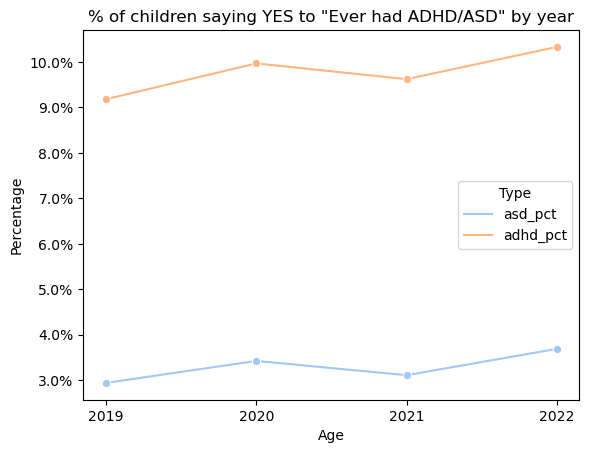

In [11]:
def percentage_formatter(x, pos):
    return f'{(x * 100):.1f}%'

melted_df = pd.melt(dfcall_yearly, id_vars=['year'], value_vars=['asd_pct', 'adhd_pct'], var_name='Type', value_name='Value')
ax = sns.lineplot(x='year', y='Value', hue='Type', data=melted_df, palette='pastel',marker='o')

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.title('% of children saying YES to "Ever had ADHD/ASD" by year')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(range(2019,2023,1))

plt.show()

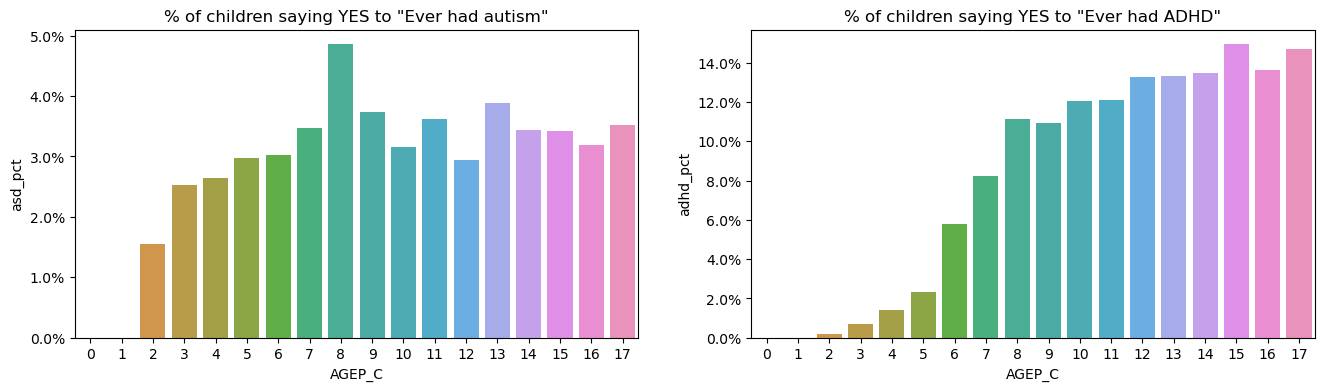

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (16,4))

# Autistic percentage by age
dfc_asd_age = pd.DataFrame(dfcall.groupby('AGEP_C')['ASDEV_C'].apply(lambda x: (x==1.0).sum())).reset_index()
dfc_asd_age.rename({'ASDEV_C' : 'asd_count'},axis=1,inplace=True)
dfc_asd_age['all_count'] = dfcall.groupby('AGEP_C')['AGEP_C'].count()
dfc_asd_age['asd_pct'] = dfc_asd_age['asd_count'] / dfc_asd_age['all_count']
sns.barplot(dfc_asd_age,x='AGEP_C',y='asd_pct',ax=axes[0])
axes[0].yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
axes[0].set_title('% of children saying YES to "Ever had autism"')


# adhd percentage by age
dfc_adhd_age = pd.DataFrame(dfcall.groupby('AGEP_C')['ADHDEV_C'].apply(lambda x: (x==1.0).sum())).reset_index()
dfc_adhd_age.rename({'ADHDEV_C' : 'adhd_count'},axis=1,inplace=True)
dfc_adhd_age['all_count'] = dfcall.groupby('AGEP_C')['AGEP_C'].count()
dfc_adhd_age['adhd_pct'] = dfc_adhd_age['adhd_count'] / dfc_adhd_age['all_count']
sns.barplot(dfc_adhd_age,x='AGEP_C',y='adhd_pct',ax=axes[1])
axes[1].yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
axes[1].set_title('% of children saying YES to "Ever had ADHD"')


# Apply the formatter to the y-axis
#plt.xlabel('Age')
#plt.ylabel('Percentage')





plt.show()

### Observations
* %-age of children identified as having/had ADHD increases by age, though likely plateau's at some point 


## Correlation analysis (WIP)

### Pearson correlation
Since ADHDEV_C and ASDEV_C is heavily skewed, we will do few rounds of random sampling with same distribution for each label, and then take average for the correlations. 

In [16]:
# ADHD
rounds = 10

dfcall_temp = dfcall.drop(columns=['HHX']).fillna(value=0)
dfc_asd = dfcall[dfcall['ASDEV_C']==1.0].drop(columns=['HHX'])
dfc_non_asd = dfcall[dfcall['ASDEV_C']==0.0].drop(columns=['HHX'])

for i in range(0,rounds): 
    dfc_non_asd_sampled = dfc_non_asd.sample(n=dfc_asd.shape[0]) 
    dfc_combined = pd.concat([dfc_asd,dfc_non_asd_sampled],axis=0)
    if i == 0:
        dfc_corr = dfc_combined.corrwith(dfc_combined['ASDEV_C']).sort_values(ascending=False).reset_index()
    else:
        dfc_corr = pd.concat([dfc_corr,dfc_combined.corrwith(dfc_combined['ASDEV_C']).sort_values(ascending=False).reset_index()],axis=0)

        
def custom_agg(group):
    return pd.Series({
        'corr_mean': group[0].mean(),
        'corr_stdev': group[0].std()
    })
dfc_corr_summary = dfc_corr.groupby(['index']).apply(custom_agg).sort_values('corr_mean',ascending=False).reset_index()
dfc_corr_summary['Description'] = pd.merge(dfc_corr_summary, cookbook_child, left_on='index', right_on='Variable Name')['Description']

dfc_corr_summary


index  corr_mean  corr_stdev  \
0         ASDEV_C   1.000000    0.000000   
1     SCHSPEDEV_C   0.718384    0.008062   
2      BEHDFCHG_C   0.610208    0.013191   
3        SDQTOT_C   0.602616    0.014248   
4       SDQIMP1_C   0.600171    0.012341   
5       SDQHYPE_C   0.591253    0.013307   
6     UNDRSTCHD_C   0.585663    0.025364   
7     UNDRSTYOU_C   0.560052    0.013495   
8       LEARNDF_C   0.545202    0.007483   
9         SDQ15_C   0.524247    0.015944   
10    BEHDFMKFR_C   0.520048    0.011914   
11      SDQPEER_C   0.517635    0.015882   
12    BEHDFCNTR_C   0.514352    0.021707   
13    BEHDFPLYG_C   0.499619    0.017078   
14         LDEV_C   0.482278    0.009320   
15         SDQ6_C   0.468603    0.027553   
16        SDQ10_C   0.459237    0.026624   
17         SDQ2_C   0.453160    0.021909   
18    UNDRSTOHH_C   0.434946    0.004650   
19       ADHDEV_C   0.401398    0.010778   
20        SDQ16_C   0.389552    0.018681   
21   REMEMBERDF_C   0.381441    0.010581   
22         DDEV_C   0.375316    0.015694   
23      SDQCOND_C   0.370055    0.014758   
24      SDQEMOT_C   0.363250    0.020121   
25         SDQ5_C   0.362917    0.017407   
26    UNDRSTIHH_C   0.330362    0.005201   
27     BEHDFFCS_C   0.325833    0.012149   
28        IDEV1_C   0.319327    0.014302   
29        SDQ23_C   0.316812    0.018963   
30       PHSTAT_C   0.309929    0.014209   
31      SDQIMP5_C   0.307000    0.035095   
32        SDQ24_C   0.300145    0.030302   
33    SDQIMPTOT_C   0.286059    0.029743   
34          SEX_C   0.271335    0.018042   
35    SCHSPEDEM_C   0.268115    0.052082   
36      SDQIMP7_C   0.250005    0.029452   
37        SDQ19_C   0.241944    0.022591   
38      SDQIMP6_C   0.240036    0.033347   
39         SDQ8_C   0.237352    0.015296   
40      SDQIMP4_C   0.226240    0.039918   
41      SCHSPED_C   0.221581    0.021171   
42      SDQIMP8_C   0.218413    0.042705   
43         DDNW_C   0.217799    0.066780   
44        SDQ13_C   0.211321    0.009839   
45     BULLYVIC_C   0.205886    0.024649   
46        SDQ12_C   0.197802    0.033645   
47      SDQIMP2_C   0.193483    0.053038   
48      SDQIMP3_C   0.192560    0.031140   
49     BEHKBHYG_C   0.184474    0.038600   
50    MENTDEPEV_C   0.155430    0.021586   
51       BMICAT_C   0.147168    0.038050   
52    HEARINGDF_C   0.130824    0.014396   
53        SDQ18_C   0.125560    0.014877   
54     VISIONDF_C   0.110399    0.018213   
55         SDQ3_C   0.107675    0.019517   
56    BULLYPERP_C   0.103591    0.021955   
57       BNEEDS_C   0.101722    0.018893   
58         LDNW_C   0.097442    0.048322   
59     UNFAIRSO_C   0.089861    0.028265   
60        IDNW1_C   0.089142    0.148398   
61      PUTDOWN_C   0.081584    0.022897   
62    ALCDRUGEV_C   0.080595    0.015595   
63       ADHDNW_C   0.078967    0.042598   
64        SDQ22_C   0.071796    0.026148   
65     LSATIS11_C   0.059539    0.020378   
66     CYBERVIC_C   0.052308    0.027698   
67         AGEP_C   0.049167    0.021817   
68    OVER65FLG_C   0.049159    0.014507   
69     VIOLENEV_C   0.046355    0.015905   
70     WEARGLSS_C   0.043062    0.019574   
71      RELTIVP_C   0.043023    0.013611   
72      JAILEV1_C   0.041178    0.018674   
73   TBILOSTCON_C   0.040682    0.016331   
74     TBIDAZED_C   0.034560    0.021974   
75        SRVY_YR   0.033342    0.018212   
76    MLTFAMFLG_C   0.033276    0.010638   
77     UNFAIRRE_C   0.007647    0.013477   
78       INTV_QRT  -0.001217    0.016367   
79       INTV_MON  -0.008449    0.016490   
80     PCNT18UPTC  -0.014486    0.016577   
81         WTFA_C  -0.015946    0.013392   
82         REGION  -0.018389    0.015963   
83     PCNTADLT_C  -0.022039    0.016550   
84     PCNTKIDS_C  -0.058626    0.016236   
85     PCNTLT18TC  -0.058686    0.015621   
86       RATCAT_C  -0.101354    0.014101   
87     POVRATTC_C  -0.104078    0.016644   
88        SDQ17_C  -0.213479    0.018896   
89      DEPFREQ_C  -0.239073    0.022153   
90      

In [17]:
# Autism
rounds = 10

dfcall_temp = dfcall.drop(columns=['HHX']).fillna(value=0)
dfc_asd = dfcall[dfcall['ADHDEV_C']==1.0].drop(columns=['HHX'])
dfc_non_asd = dfcall[dfcall['ASDEV_C']==0.0].drop(columns=['HHX'])

for i in range(0,rounds): 
    dfc_non_asd_sampled = dfc_non_asd.sample(n=dfc_asd.shape[0]) 
    dfc_combined = pd.concat([dfc_asd,dfc_non_asd_sampled],axis=0)
    if i == 0:
        dfc_corr = dfc_combined.corrwith(dfc_combined['ADHDEV_C']).sort_values(ascending=False).reset_index()
    else:
        dfc_corr = pd.concat([dfc_corr,dfc_combined.corrwith(dfc_combined['ADHDEV_C']).sort_values(ascending=False).reset_index()],axis=0)

        
def custom_agg(group):
    return pd.Series({
        'corr_mean': group[0].mean(),
        'corr_stdev': group[0].std()
    })
dfc_corr_summary = dfc_corr.groupby(['index']).apply(custom_agg).sort_values('corr_mean',ascending=False).reset_index()
dfc_corr_summary['Description'] = pd.merge(dfc_corr_summary, cookbook_child, left_on='index', right_on='Variable Name')['Description']

dfc_corr_summary


index  corr_mean    corr_stdev  \
0        ADHDEV_C   1.000000  6.409876e-17   
1       SDQHYPE_C   0.613309  6.107344e-03   
2         SDQ15_C   0.599287  5.898585e-03   
3       SDQIMP1_C   0.558660  1.151943e-02   
4        SDQTOT_C   0.534975  8.824222e-03   
5          SDQ2_C   0.475522  7.395862e-03   
6     SCHSPEDEV_C   0.467978  6.296768e-03   
7         SDQ10_C   0.445596  1.000914e-02   
8     BEHDFCNTR_C   0.398015  4.239949e-03   
9     UNDRSTYOU_C   0.384187  4.534019e-02   
10     BEHDFCHG_C   0.379666  7.975057e-03   
11      LEARNDF_C   0.362108  4.691360e-03   
12    BEHDFPLYG_C   0.360165  5.285513e-02   
13         LDEV_C   0.352913  6.751103e-03   
14      SDQCOND_C   0.325128  1.033756e-02   
15   REMEMBERDF_C   0.321560  2.494017e-03   
16      SDQEMOT_C   0.313942  1.034807e-02   
17         AGEP_C   0.305211  8.293485e-03   
18     BEHDFFCS_C   0.299733  8.043818e-03   
19      SDQIMP6_C   0.298367  1.360812e-02   
20         SDQ5_C   0.295101  1.492565e-02   
21      SDQPEER_C   0.289303  9.110543e-03   
22    BEHDFMKFR_C   0.288456  6.807935e-03   
23        SDQ16_C   0.282984  8.943429e-03   
24    SCHSPEDEM_C   0.276951  2.658911e-02   
25         SDQ8_C   0.264371  1.165327e-02   
26    UNDRSTCHD_C   0.262917  3.060658e-02   
27        ASDEV_C   0.257668  1.244204e-03   
28        SDQ19_C   0.252554  1.182888e-02   
29     BEHKBHYG_C   0.237793  1.997503e-02   
30        SDQ18_C   0.231719  1.079791e-02   
31     BULLYVIC_C   0.228472  1.567429e-02   
32       PHSTAT_C   0.228398  8.582029e-03   
33      SDQIMP2_C   0.223250  2.980149e-02   
34         DDEV_C   0.221468  6.884070e-03   
35        SDQ13_C   0.215272  1.050669e-02   
36    SDQIMPTOT_C   0.212203  1.487884e-02   
37         SDQ6_C   0.190467  1.467806e-02   
38    MENTDEPEV_C   0.182797  1.087925e-02   
39        SDQ24_C   0.177116  1.110562e-02   
40          SEX_C   0.175564  1.098302e-02   
41      SDQIMP4_C   0.171420  2.113542e-02   
42         SDQ3_C   0.168197  1.017708e-02   
43    ALCDRUGEV_C   0.165772  1.009914e-02   
44    UNDRSTOHH_C   0.164202  6.694272e-03   
45        SDQ12_C   0.162104  8.176317e-03   
46      SCHSPED_C   0.158933  1.980960e-02   
47      SDQIMP8_C   0.156040  1.563759e-02   
48      SDQIMP5_C   0.155641  2.087636e-02   
49     VIOLENEV_C   0.154725  1.140639e-02   
50      PUTDOWN_C   0.152208  1.304925e-02   
51     WEARGLSS_C   0.150970  9.897721e-03   
52        IDEV1_C   0.149089  1.410321e-02   
53        SDQ23_C   0.148816  1.506297e-02   
54     CYBERVIC_C   0.135733  1.772264e-02   
55    UNDRSTIHH_C   0.133999  3.954585e-03   
56      SDQIMP7_C   0.129313  1.064203e-02   
57      JAILEV1_C   0.128688  7.819998e-03   
58        SDQ22_C   0.128502  1.520468e-02   
59      SDQIMP3_C   0.127934  1.420205e-02   
60    BULLYPERP_C   0.121881  1.911842e-02   
61       BNEEDS_C   0.111924  1.536148e-02   
62         DDNW_C   0.108443  2.488801e-02   
63   TBILOSTCON_C   0.101623  8.869501e-03   
64         LDNW_C   0.093266  1.782690e-02   
65     VISIONDF_C   0.088296  9.493187e-03   
66     UNFAIRRE_C   0.080630  1.445728e-02   
67    HEARINGDF_C   0.075320  1.257563e-02   
68     UNFAIRSO_C   0.069746  2.093992e-02   
69      RELTIVP_C   0.065435  9.100123e-03   
70     TBIDAZED_C   0.063557  1.212148e-02   
71    OVER65FLG_C   0.045280  8.665080e-03   
72    MLTFAMFLG_C   0.035346  1.050328e-02   
73       BMICAT_C   0.030127  1.690812e-02   
74        SRVY_YR   0.021827  6.201362e-03   
75       INTV_MON   0.017697  1.271595e-02   
76       INTV_QRT   0.013932  1.406125e-02   
77        IDNW1_C  -0.009096  1.375580e-01   
78         REGION  -0.039627  1.239468e-02   
79     LSATIS11_C  -0.049607  1.087463e-02   
80         WTFA_C  -0.049928  9.301642e-03   
81     POVRATTC_C  -0.052572  1.238449e-02   
82     PCNT18UPTC  -0.061855  1.049895e-02   
83     PCNTADLT_C  -0.067688  1.038190e-02   
84       RATCAT_C  -0.067751  9.383359e-03   
85     PCNTLT18TC  -0.077173  1.201255e-02   
86     PCN

### Observations

* For ASD, top notable correlated behavioral questions were:
   * Difficulty with changes in routine
   * Difficulties with emotions, behaviors
   * Respondent's difficulty understanding child
   * Child's difficulty understanding respondent
   * Difficulty learning things
   * Easily distracted
   * Difficulty making friends
   * Difficulty controlling behavio
   * Difficulty playing
* For ADHD, top notable correlated behavioral questions were:
   * Easily distracted
   * Difficulties with emotions, behaviors
   * Restless, cannot stay still
   * Constantly fidgeting/squirming
   * Difficulty controlling behavior
   * Child's difficulty understanding respondent
   * Difficulty with changes in routine
   * Difficulty learning things
   * Difficulty playing
   * Ever had learning disability
* There are definitely similar patterns between the two, but with ADHD having more specific correlation such as restlessness or fidgeting
* Note that most of the variables are binary or discrete, so pearson correlation may not be the best use. However in this context we are just looking at relative rank differences so we will only look at pearson's

# ETCs

Past analysis with non-notable outcomes

In [ ]:
# Is ihe increase in ADD/ADHD differ by year? 
def custom_agg(group):
    return pd.Series({
        'adhd_count': group['ADHDEV_C'].sum(),
        'all_count': group['AGEP_C'].count()
    })
dfc_adhd_age = pd.DataFrame(dfcall.groupby(['AGEP_C','SRVY_YR']).apply(custom_agg)).reset_index()
dfc_adhd_age['adhd_pct'] = dfc_adhd_age['adhd_count'] / dfc_adhd_age['all_count']

ax = sns.lineplot(x='AGEP_C', y='adhd_pct', hue='SRVY_YR', data=dfc_adhd_age, palette='flare',marker='o')

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.title('% of children saying YES to "Ever had ADHD/ASD" by year')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(range(0,18,1))

plt.show()

#Don't really see clear pattern